# Basic functions of Criq 
Usage of frequently used Cirq functions

In [91]:
import cirq
import numpy as np

### Google Quantum Hardware

In [2]:
print(cirq.google.Bristlecone)

                                             (0, 5)────(0, 6)
                                             │         │
                                             │         │
                                    (1, 4)───(1, 5)────(1, 6)────(1, 7)
                                    │        │         │         │
                                    │        │         │         │
                           (2, 3)───(2, 4)───(2, 5)────(2, 6)────(2, 7)───(2, 8)
                           │        │        │         │         │        │
                           │        │        │         │         │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)────(3, 6)────(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │         │         │        │        │
                  │        │        │        │         │         │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)────(4, 6)────(4, 7)───(4, 8)───(4, 9)───(4, 10)
         │        │      

## Create a Qubit

In [4]:
#Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

#OR
#Line-Qubit
qubits = cirq.LineQubit.range(3)
#Creates a array/list of Qubits

#OR
#Grid-Qubit
qubits = [cirq.GridQubit(x, y) for x in range(3) for y in range(3)]

## Build a circuit

In [16]:
circuit=cirq.Circuit()
print(circuit)

### Adding Gates

In [17]:
circuit.append(cirq.H(a))
print(circuit)

a: ───H───


#### Hadmard Gate
Puts the qubit in superposition. But what is it exactly?

In [18]:
cirq.unitary(cirq.H)

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

#### Let make a measurement..!

In [19]:
circuit.append(cirq.measure(a))

In [20]:
simulator = cirq.Simulator()
result = simulator.run(circuit)
print('Measurement results')
print(result)

Measurement results
a=1


In [33]:
ops=[cirq.H(a), cirq.H(b), cirq.measure(a,b)]
circuit=cirq.Circuit(ops)
print(circuit)

a: ───H───M───
          │
b: ───H───M───


In [37]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=0000111011110000110100000111101000011000000000010011101001101101001100001011001001010111111010001010, 0010101010110100010100001101110101110011010110001001111110100100011101110100010010100100010110000101


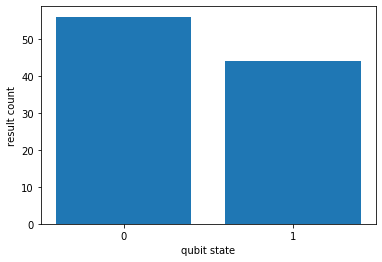

array([56., 44.])

In [39]:
from cirq import plot_state_histogram as plt_hist 
plt_hist(result)

As expected both qubits are in state of superposition and as soon as we measure it they collapse down to one of the states with 50% probability

#### CNOT gate
This gate acts like Controlled not gate one of the input acts as signal ON/OFF(1/0) to the NOT gate which is applied to other input. So for example:

In [44]:
circ=cirq.Circuit([cirq.H(a), cirq.CNOT(a,b), cirq.measure(a,b)])
print(circ)

a: ───H───@───M───
          │   │
b: ───────X───M───


In [45]:
simulator=cirq.Simulator()
result=simulator.run(circ,repetitions=100)

In [76]:
result.histogram(key="a,b")

Counter({3: 51, 0: 49})

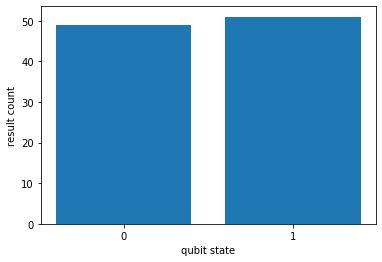

array([49., 51.])

In [80]:
plt_hist(result)

In [81]:
cirq.unitary(cirq.CNOT)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

We also call this as state of entanglement

### Moments

In [86]:
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b, c), cirq.H(b)]
circuit = cirq.Circuit(ops)
print(circuit)

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


In [87]:
for i, moment in enumerate(circuit):
    print('Moment {}: {}'.format(i, moment))

Moment 0: H(a) and H(b)
Moment 1: CNOT(b, c)
Moment 2: H(b)


This prints all the operations on circuit that take place at one time instance in order

In [89]:
print(repr(circuit))

cirq.Circuit([
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('a')),
        cirq.H.on(cirq.NamedQubit('b')),
    ]),
    cirq.Moment(operations=[
        cirq.CNOT.on(cirq.NamedQubit('b'), cirq.NamedQubit('c')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('b')),
    ]),
])


### Moment By Moment simulation

#### Rotation

In [93]:
circuit = cirq.Circuit([cirq.rx(np.pi)(a)])
print(circuit)

a: ───Rx(π)───


Let us now rotate the probability amplitude vector of a qubit by small delta and observe its probability of collapsing to spin 0

In [95]:
a = cirq.NamedQubit('a')
simulator = cirq.Simulator()
delta=np.pi / 30.0
circuit = cirq.Circuit([cirq.rx(delta)(a) for theta in range(200)])
print("Circuit with 200 number of ",delta,"roundtations along X-axis:")
print(circuit)

Circuit with 200 number of  0.10471975511965977 roundtations along X-axis:
a: ───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π)───Rx(0.033π

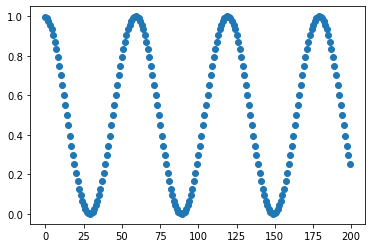

In [96]:
from matplotlib.pyplot import plot
probs = []
iteration = []
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    prob = np.abs(step.state_vector()) ** 2
    iteration.append(i)
    probs.append(prob[0])
plot(iteration, probs, 'o')

The state vector gives probability of State 0 at each moment